<a href="https://colab.research.google.com/github/i-moes/TM10007_PROJECT/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment Group 7

---



In [1]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/i-moes/TM10007_PROJECT.git

# Install packages
!pip install sklearn numpy matplotlib

In [0]:
# # General packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets as ds
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

pd.options.mode.chained_assignment = None  # default='warn'

import sys
import os
import pandas as pd
from sklearn.decomposition import PCA



## Section 0: Functions

In [0]:


def preprocessing(data):
  '''
  '''

  # Extract labels from dataframe
  labels = data['label']
  # Drop column containing patient labels for imputation
  data = data.drop(columns=['label'])

  ## Cleaning data from NaN, zero, #DIC/0! errors and inf values
  # Replace all zero values with NaN
  data.replace(0, np.nan, inplace=True)
  # Replace all zero division errors with NaN
  data.replace('#DIV/0!', np.nan, inplace=True)
  # Replace all inf values with NaN
  data.replace(np.inf, np.nan, inplace=True)

  # Add labels to dataframe
  data['label'] = labels

  # Remove column when >5% of values is NaN
  data.dropna(axis = 1, thresh=0.95*len(data.index), inplace=True)

  # Extract labels from dataframe
  labels = data['label']
  # Drop column containing patient labels for imputation
  data = data.drop(columns=['label'])
  
  return data, labels


def splitting_train_test(data, labels, size_test):
    '''
    Splitting the data and corresponding labels into a train and test set.
    The test data should contain 45% of the data.

    Parameters
    ----------

    data : array-like, shape (n_samples, n_features)
        Data, where n_samples is the number of samples
        and n_features is the number of features.

    labels : array, shape = [n_samples]
        True binary labels

    size_test : array, shape = [size_test]
        Required part of data to be used for testing (0-1)

    Returns
    -------

    x_train : array-like, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples
        and n_features is the number of features.

    x_test : array-like, shape (n_samples, n_features)
        Testing data, where n_samples is the number of samples
        and n_features is the number of features.

    y_train : array, shape = [n_samples]
        True binary labels of train set

    y_test : array, shape = [n_samples]
        True binary labels of test set
    '''

    try:
        x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=size_test)
    except ValueError:
        print('Not enough subjects to split into train and test set.')
        sys.exit()

    # Convert labels of train and test set to array
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)

    return x_train, x_test, y_train, y_test


def train_pca(x_train, x_test, components=4):
    '''
    The  Principal component analysis (PCA) training function creates
    and fits the PCA to transform point data into
    based on an amount of prinicipal components.
    Returns the transformed point data.

    Parameters
    ----------

    x_train : array-like, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples
        and n_features is the number of features.

    x_test : array-like, shape (n_samples, n_features)
        Testing data, where n_samples is the number of samples
        and n_features is the number of features.

    components : integer
        Amount of used principal components.
        Default value is 4 principal components

    Returns
    -------

    x_train_trans : array-like, shape (n_samples, n_features)
        Transformed training data, where n_samples is the number of samples
        and n_features is the number of features.

    x_test_trans : array-like, shape (n_samples, n_features)
        Transformed test data, where n_samples is the number of samples
        and n_features is the number of features.
    '''

    try:
        # Create a PCA which retains an amount of principle components
        pca = PCA(n_components=components)

        # Fit the PCA model
        pca.fit(x_train)

        # Transform data
        x_train_trans = pca.transform(x_train)
        x_test_trans = pca.transform(x_test)

        return x_train_trans, x_test_trans
    
    except ValueError:
        print('Not enough subjects per set to fit the requested amount of components in PCA.')
        sys.exit()
  

def pca4_plot(data, labels):
    '''
    Function to pairplot the results of the principal components analysis by creating
    a dataframe of the the data and labels. 

    Parameters
    ----------
    data : array-like, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples
        and n_features is the number of features.

    labels : array, shape = [n_samples]
        Corresponding labels for data
    '''

    dataframe = pd.DataFrame(data)
    dataframe['label'] = labels

    print(dataframe.head())

    # Plotting the pairplot
    pair_plot = sns.pairplot(dataframe, hue='label')



## Section 1: Data loading

In this section the data is loaded, splitted and preprocessed.

The data is splitted into a train and test set. This is done using train_test_split from sklearn.model_selection. The test data contains 45% of the data. 

In [150]:
## Load Data

from brats.load_data import load_data
data = load_data()

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')


The number of samples: 167
The number of columns: 725


## Section 2: Preprocessing and Splitting

In this section ... 

In [151]:
# Clean data for NaN, zero, #DIC/0! errors and inf values
data_c, labels_c = preprocessing(data)

# Split data into train and test set
x_train, x_test, y_train, y_test = splitting_train_test(data_c, labels_c, 0.3)

# Impute for NaN values
imputor = KNNImputer(n_neighbors=5, weights='distance')
# this will look for all columns where we have NaN value and replace the NaN value with specified test statistic
data_imp_train = x_train
data_imp_test = x_test
# Fit imputor on training set and apply to all sets
array_imp_train = imputor.fit_transform(data_imp_train)
array_imp_test = imputor.transform(data_imp_test)
data_imp_train[:] = array_imp_train
data_imp_test[:] = array_imp_test

print(f'The number of samples in train set imp: {len(data_imp_train.index)}')
print(f'The number of samples in test set imp: {len(data_imp_test.index)}')
print(f'The number of columns in train set imp: {len(data_imp_train.columns)}')
print(f'The number of columns in test set imp: {len(data_imp_test.columns)}')

## Scaler
scaler = sklearn.preprocessing.StandardScaler().fit(data_imp_train)
x_train_transformed = scaler.transform(data_imp_train)
x_test_transformed = scaler.transform(data_imp_test)


The number of samples in train set imp: 116
The number of samples in test set imp: 51
The number of columns in train set imp: 456
The number of columns in test set imp: 456


## Section 3: Feature Extraction

Features are extracted from the train set with  ... 

Size of x_train after pca: (116, 4)
Size of x_test after pca: (51, 4)
Length of train labels: 116
Length of x_train after pca: 116
           0         1         2         3 label
0   3.265443 -1.889940 -6.389977 -3.346377   LGG
1 -10.913269 -7.348663  3.741442  6.863262   LGG
2   1.499350 -0.455754 -9.875174  3.499458   LGG
3  -3.304255  5.109348 -5.923705 -3.177579   GBM
4 -10.119493  6.363395  2.648091  1.507698   GBM


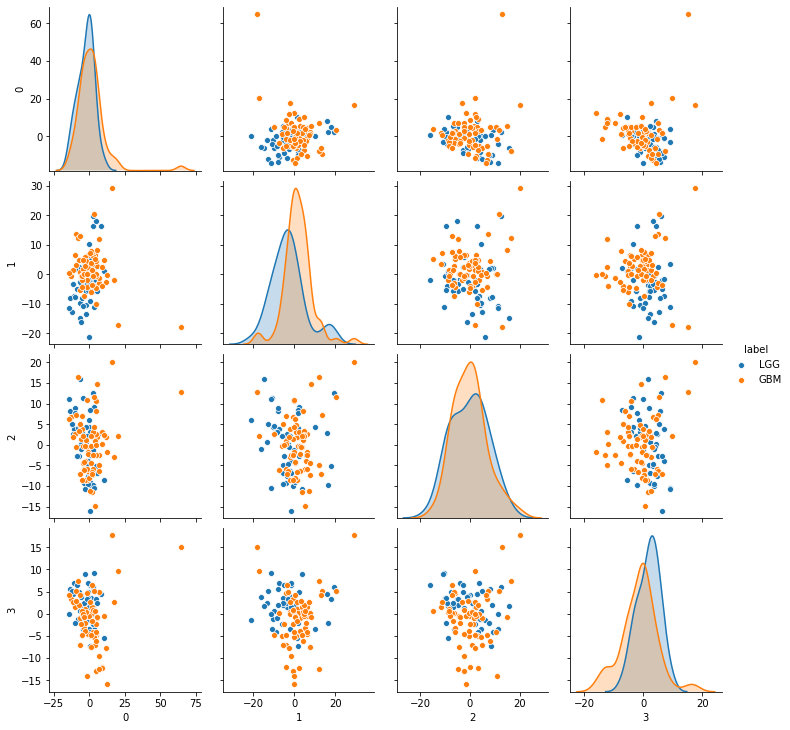

In [152]:
# Feature extraction
x_train_trans, x_test_trans = train_pca(x_train_transformed, x_test_transformed, components=4)

print(f'Size of x_train after pca: {x_train_trans.shape}')
print(f'Size of x_test after pca: {x_test_trans.shape}')
print(f'Length of train labels: {len(y_train)}')
print(f'Length of x_train after pca: {len(x_train_trans)}')

pca4_plot(x_train_trans, y_train)


## Section 4: Training Classifiers

In this section ... are trained on the train set using sklearn. 

In [153]:
# Classifiers trained
classifiers = [
    KNeighborsClassifier(5),
    GaussianNB(),
    DecisionTreeClassifier()]
names_clf = ['KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier']

# Create empty dataframe for results
scores = pd.DataFrame()

for num, clf in enumerate(classifiers):

    # Create pipeline
    #steps = [('imputation', KNNImputer(n_neighbors=5, weights='distance')),
         #('scaler', sklearn.preprocessing.StandardScaler()),
         # ('clf', clf)]
    steps = [('clf', clf)]
    pipeline = Pipeline(steps)

    # Use cross-validation 
    kfold = KFold(n_splits=6)
    results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
    # Add results to dataframe
    scores[num] = results

    print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))
  
# Change column names to classifier name
scores.columns = names_clf

print(scores)

Accuracy: 0.69 (+/- 0.09)
Accuracy: 0.51 (+/- 0.16)
Accuracy: 0.89 (+/- 0.11)
   KNeighborsClassifier  GaussianNB  DecisionTreeClassifier
0              0.600000    0.450000                0.900000
1              0.700000    0.550000                0.850000
2              0.736842    0.421053                0.947368
3              0.684211    0.578947                0.947368
4              0.736842    0.631579                0.894737
5              0.684211    0.421053                0.789474


## Section 5: Performance Evaluation

Testing classifiers on test set. The following evaluation measures are evaluated:


*   Accuracy
*   F1-Score
*  AUC



In [0]:
# Metrics 